<div class="alert block alert-info alert">

# <center> Scientific Programming in Python

## <center>Karl N. Kirschner<br>Bonn-Rhein-Sieg University of Applied Sciences<br>Sankt Augustin, Germany

# <center> NumPy: NUMerical PYthon

<b>Source</b>: https://numpy.org/doc/stable/
<br><br>


NumPy is the foundation for
- Pandas
- Matplotlib
- Scikit-learn
- PyTorch


- Excels at large <b>arrays</b> of data (i.e., VERY efficient)
    - RAM usage, and thus
    - Speed


- Array: an n-dimensional array (i.e., NumPy's name: `ndarray`):
    - a collection of values that have 1 or more dimensions
    - 1D array --> vector
    - 2D array --> matrix
    - nD array --> tensor


- All array data must be the same (i.e., homogeneous)


- Can perform computations on entire arrays without the need for loops


- Contains some nice mathematical functions/tools (e.g., data extrapolation) - will be covered in the SciPy lecture


- Does not come by default with Python - must be installed

<hr style="border:2px solid gray"></hr>

<b>Comparisons to a regular list</b>:
1. Both are containers for items/elements
2. NumPy allows for faster item/element getting (allows for faster mathematics), but
3. Lists are faster to insert new items and remove existing items

<hr style="border:2px solid gray"></hr>

#### Key Concept for NumPy
1. Each element in an array must be the same type (e.g., floats)
    - allows for efficient usage of RAM
    - NumPy always knows what the content of the array is


2. <b>Vectorizing operations</b><br>
    "This practice of replacing explicit loops with array expressions is commonly referred to as vectorization."
    - source: https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html
    - do math operations all at once (i.e., does it one time only) on an ndarray


3. Integrates with C, C++ and Fortran to improve performance
    - In this sense, NumPy is  an intermediary between these low-level libraries and Python


4. The raw array data is put into a contiguous (and fixed) block of RAM
    - good at allocating space in RAM for storing the ndarrays
    

<b>More Information</b> for what is happening "under-the-hood": https://numpy.org/doc/stable/dev/internals.html#numpy-internals

<hr style="border:2px solid gray"></hr>

<b>Citing NumPy</b>: (https://numpy.org/citing-numpy/)

Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020).

@Article{         harris2020array,  
 title         = {Array programming with {NumPy}},  
 author        = {Charles R. Harris and K. Jarrod Millman and St{\'{e}}fan J.
                 van der Walt and Ralf Gommers and Pauli Virtanen and David
                 Cournapeau and Eric Wieser and Julian Taylor and Sebastian
                 Berg and Nathaniel J. Smith and Robert Kern and Matti Picus
                 and Stephan Hoyer and Marten H. van Kerkwijk and Matthew
                 Brett and Allan Haldane and Jaime Fern{\'{a}}ndez del
                 R{\'{i}}o and Mark Wiebe and Pearu Peterson and Pierre
                 G{\'{e}}rard-Marchant and Kevin Sheppard and Tyler Reddy and
                 Warren Weckesser and Hameer Abbasi and Christoph Gohlke and
                 Travis E. Oliphant},  
 year          = {2020},  
 month         = sep,  
 journal       = {Nature},  
 volume        = {585},  
 number        = {7825},  
 pages         = {357--362},  
 doi           = {10.1038/s41586-020-2649-2},  
 publisher     = {Springer Science and Business Media {LLC}},  
 url           = {https://doi.org/10.1038/s41586-020-2649-2}  
}

In [1]:
## For extra information given within the lectures

from IPython.display import HTML


def set_code_background(color: str):
    ''' Set the background color for code cells.

        Source: psychemedia via https://stackoverflow.com/questions/49429585/
                how-to-change-the-background-color-of-a-single-cell-in-a-jupyter-notebook-jupy

        To match Jupyter's dev class colors:
            "alert alert-block alert-warning" = #fcf8e3

        Args:
            color: HTML color, rgba, hex
    '''

    script = ("var cell = this.closest('.code_cell');"
              "var editor = cell.querySelector('.input_area');"
              f"editor.style.background='{color}';"
              "this.parentNode.removeChild(this)")
    display(HTML(f'<img src onerror="{script}">'))


set_code_background(color='#fcf8e3')

<hr style="border:2px solid gray"></hr>

In [1]:
import numpy as np
import pandas as pd
import timeit

print(np.__version__)
print(pd.__version__)

#%matplotlib inline

2.2.3
2.2.3


## N-dimensional array object (i.e., ndarray)

Let's create two objects:
1. a regular list
2. a numpy array via <b>A</b>rray <b>RANGE</b> (`arange`): https://numpy.org/doc/stable/reference/generated/numpy.arange.html), and


Then we can find demonstrate which is faster using the timeit library.

- timeit (to time code for performance): https://docs.python.org/3/library/timeit.html

In [2]:
my_list = list(range(100000))

print(type(my_list))
my_list

<class 'list'>


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [3]:
my_array = np.arange(100000)
my_array

array([    0,     1,     2, ..., 99997, 99998, 99999], shape=(100000,))

Now, let's multiply containers by 2, and do that math 10000 times.

We need two "callable" functions for using `timeit` library.

<b>Disclaimer</b> - I am not properly formulating the functions below (e.g., including typing, context, etc.) in order to simplify the content for learning purposes.

In [4]:
def list_multiply(test_list):
    return [item*2 for item in test_list]


def numpy_multiply(test_array):
    return test_array*2

#### timeit
https://docs.python.org/3/library/timeit.html

A very good library for testing code performance.

Multiply containers by 2, and do that math 2,000 times.

For `timeit`, we can call our function through the use of a `lambda` (i.e., <b>anonymous</b>; see below for more info) function.

In [5]:
timeit.timeit(lambda:list_multiply(my_list), number=2000)

8.200753901001008

In [6]:
timeit.timeit(lambda:numpy_multiply(my_array), number=2000)

0.11767238100037503

<b>Result</b> - the use of NumPy arrays is significantly faster than that for lists.

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information

### 1. `lambda` functions
- anonymous functions for quick tasks
- https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

### 2. `time`
- an alternative timing library
- https://docs.python.org/3/library/time.html

### 3. `_` - underscore

Notice how the underscore symbol will be used above. There are several instances where one can use `_` in Python (see https://www.datacamp.com/tutorial/role-underscore-python), but in the below example it is employed

1. to represent a variable that is not used further.

In [7]:
import time


## Regular List
start_time = time.process_time()

for _ in range(10000):
    list_multiply(my_list)

stop_time = time.process_time()

print(f"List timing: {stop_time - start_time:0.1f} seconds")


## NumPy Array
start_time = time.process_time()

for _ in range(10000):
    numpy_multiply(my_array)

stop_time = time.process_time()

print(f"NumPy timing: {stop_time - start_time:0.1f} seconds")

List timing: 38.4 seconds
NumPy timing: 0.4 seconds


<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

<hr style="border:2px solid gray"></hr>

## Creating NumPy Arrays from Scratch

In the following, we will create several arrays that we can use throughout this lecture.

### Conversion from lists
Let's create 2 data lists (i.e., 1-dimensional lists; aka <b>vectors</b>) with 5 data points each

In [8]:
list_1 = [6, 1, 6, 7, 9]
list_2 = [3, 5, 4, 2, 8]

Now create two arrays, with <b>shapes</b> of <b>(5,)</b>:

In [9]:
array_1 = np.array(list_1)
array_2 = np.array(list_2)

display(array_1)
display(array_2)

array([6, 1, 6, 7, 9])

array([3, 5, 4, 2, 8])

Create a new <b>nested list</b> (aka <b>matrix</b>), and then <b>convert</b> the nested lists to a <b>NumPy array</b> with a <b>shape</b> of <b>(2, 5)</b>:

In [10]:
list_3 = [list_1, list_2]
list_3

[[6, 1, 6, 7, 9], [3, 5, 4, 2, 8]]

In [11]:
array_3 = np.array(list_3)
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

Thus, the <b>Shape = (rows, columns)</b>. So, <b>(2,5) = <b>2</b> rows and <b>5</b> columns.

We can **easily see** this if we make a **Pandas `DataFrame`**:

In [12]:
pd.DataFrame(array_3)

,0,1,2,3,4
0,6,1,6,7,9
1,3,5,4,2,8


Now for `array_1` (i.e., <b>(5,) = 5 rows and 1 column</b>):

In [13]:
pd.DataFrame(array_1)

,0
0,6
1,1
2,6
3,7
4,9


### Array shapes and dimensions

#### 1D shape

Recall that we created `array_1` via:

`list_1 = [6, 1, 6, 7, 9]`

`array_1 = np.array(list_1)`

Since we have it as a NumPy array, we can get's it shape:

In [14]:
display(array_1)

array_1.shape

array([6, 1, 6, 7, 9])

(5,)

<b>Note</b>: this would change if you added <b>double brackets</b> (i.e., a nested list) to the above declaration.

In [15]:
example = [[6, 1, 6, 7, 9]]

test = np.array(example)

display(test)

print()

display(pd.DataFrame(test))

test.shape

array([[6, 1, 6, 7, 9]])

,0,1,2,3,4
0,6,1,6,7,9


(1, 5)

#### nD shape and number of dimensions

Use `array_3` as an example:

In [16]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

In [17]:
array_3.shape

(2, 5)

In [18]:
array_3.ndim

2

#### Data types

Describes what <b>type</b> the <b>items</b> are <b>within</b> an array.

- https://numpy.org/doc/stable/reference/arrays.dtypes.html
- https://numpy.org/doc/stable/user/basics.types.html

In [19]:
array_3.dtype

dtype('int64')

Reminder of using `type` to figure out what the object is that you are dealing with:

In [20]:
type(array_3)

numpy.ndarray

<hr style="border:2px solid gray"></hr>

## More on creating new arrays

#### An array that contains the same number - `np.full`

Create an array with a shape of <b>(3, 5)</b>, and <b>fill</b> it with an approximate <b>pi</b> value (e.g., 3.14):
- <font color='dodgerblue'>1 ndarray</font>, containing
- <font color='dodgerblue'>3 lists</font>, with
- each containing <font color='dodgerblue'>5 ca. pi</font> values


- `np.full`: https://numpy.org/devdocs/reference/generated/numpy.full.html#numpy.full


In [21]:
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

#### An array of integers - `np.arange`

Create an array with a shape of <b>(1, 30)</b> from <b>-10 to 50</b> using a <b>stepping size of 2</b>

(similar to built-in `range` function)

- `np.arrange`: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [22]:
np.arange(-10, 52, 2)

array([-10,  -8,  -6,  -4,  -2,   0,   2,   4,   6,   8,  10,  12,  14,
        16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,
        42,  44,  46,  48,  50])

#### An array of floats - `np.linspace`

Create an array wiha shape of <b>(10,)</b> that contains <b>10 evenly spaced values</b> between <b>-1 and 1</b>

- `np.linspace`: https://numpy.org/devdocs/reference/generated/numpy.linspace.html

In [23]:
np.linspace(-1, 1, num=10)

array([-1.        , -0.77777778, -0.55555556, -0.33333333, -0.11111111,
        0.11111111,  0.33333333,  0.55555556,  0.77777778,  1.        ])

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information

### 1. Creating an array of nested lists containing floats

Source: Fırat Korkmaz, "Is there a multi-dimensional version of arange/linspace in numpy?" https://stackoverflow.com/questions/32208359/is-there-a-multi-dimensional-version-of-arange-linspace-in-numpy/55675355#55675355. Accessed on Nov. 15, 2022.
<br><br>


Create an array with 15 nested lists containing 2 items each (i.e., an array with shape (15,2))
- the first (i.e. `(1.0, 2.0)`) and last (i.e. `(10.0, 20.0)`) tuple specifies the values for the first and last list (indexed sequentially), with the indexes of the middle lists filled with values that range between the respective values (i.e. from <b>1.0--10.0</b> and from <b>2.0--20.0</b>).

In [24]:
np.linspace((1.0, 2.0), (10.0, 20.0), num=15)

array([[ 1.        ,  2.        ],
       [ 1.64285714,  3.28571429],
       [ 2.28571429,  4.57142857],
       [ 2.92857143,  5.85714286],
       [ 3.57142857,  7.14285714],
       [ 4.21428571,  8.42857143],
       [ 4.85714286,  9.71428571],
       [ 5.5       , 11.        ],
       [ 6.14285714, 12.28571429],
       [ 6.78571429, 13.57142857],
       [ 7.42857143, 14.85714286],
       [ 8.07142857, 16.14285714],
       [ 8.71428571, 17.42857143],
       [ 9.35714286, 18.71428571],
       [10.        , 20.        ]])

<div class="alert alert-block alert-warning">

For further illustration...

Create an array with 15 nested lists containing 3 items each (i.e., an array with shape (15,3)):

Notice for each nested list:
- index 0 ranges from 1.0--10.0
- index 1 ranges from 1.5--15.0
- index 2 ranges from 2.0--20.0

In [25]:
np.linspace((1.0, 1.5, 2.0), (10.0, 15.0, 20.0), num=15)

array([[ 1.        ,  1.5       ,  2.        ],
       [ 1.64285714,  2.46428571,  3.28571429],
       [ 2.28571429,  3.42857143,  4.57142857],
       [ 2.92857143,  4.39285714,  5.85714286],
       [ 3.57142857,  5.35714286,  7.14285714],
       [ 4.21428571,  6.32142857,  8.42857143],
       [ 4.85714286,  7.28571429,  9.71428571],
       [ 5.5       ,  8.25      , 11.        ],
       [ 6.14285714,  9.21428571, 12.28571429],
       [ 6.78571429, 10.17857143, 13.57142857],
       [ 7.42857143, 11.14285714, 14.85714286],
       [ 8.07142857, 12.10714286, 16.14285714],
       [ 8.71428571, 13.07142857, 17.42857143],
       [ 9.35714286, 14.03571429, 18.71428571],
       [10.        , 15.        , 20.        ]])

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

#### An array of random numbers - `np.random.random_sample`

Create array with **random**, **values between 0 and 1**
- random.random_sample function: https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html#numpy.random.random_sample

An array with a shape of <b>(3,)</b>:

In [26]:
np.random.random_sample(3)

array([0.50027873, 0.58620154, 0.47049097])

An array with a shape of <b>(3, 4)</b>:

In [27]:
np.random.random_sample((3, 4))

array([[0.98869218, 0.51612248, 0.03319702, 0.61411543],
       [0.1336973 , 0.52302181, 0.51525964, 0.91037628],
       [0.54559211, 0.78603214, 0.53223163, 0.9879165 ]])

<hr style="border:2px solid gray"></hr>

## Accessing arrays

#### One dimensional array
Let's look at the <b>(5,)</b> `array_1` from above

In [28]:
array_1

array([6, 1, 6, 7, 9])

Accessing the <font color="dodgerblue">fourth item</font> position (i.e., at an index of 3)

In [29]:
array_1[3]

np.int64(7)

#### A multidimensional array

Now look at a 2D array (i.e., the <b>(2, 5)</b> array_3 from above)

In [30]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

Access the <font color="dodgerblue">fist sublist</font> from the 2D array

i.e., array([<font color="dodgerblue"><b>[6,  1,  6,  7,  9]</b></font>, [-5,  0,  2,  4,  3]]

In [31]:
array_3[0]

array([6, 1, 6, 7, 9])

Access the <font color="dodgerblue">second sublist, fourth item</font> (i.e., **list positions 1** and then **item position 3**)

i.e., array([[6,  1,  6,  7,  9], [3, 5, 4, <font color="dodgerblue"><b>2</b></font>,  8]]

In [32]:
array_3[1, 3]

np.int64(2)

#### Slicing an array

Demo using `array_3[0]` and slicing via
- [0:1]
- [1:2]
- [0:2]
- [0:3]

Slice to obtain the first nested array (same as `array_3[0]`):

In [33]:
array_3[0:1]

array([[6, 1, 6, 7, 9]])

Slice to obtain the second nested array

In [34]:
array_3[1:2]

array([[3, 5, 4, 2, 8]])

Slice to obtain the entire array

In [35]:
array_3[0:2]

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

<b>Notice</b> that we can specify upper numbers that go beyond the array, without giving an error:

In [36]:
array_3[0:6]

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

But a better way would be to give just the array, since it <b>removes possible confusion</b> over the unclear slicing (i.e., <b>concise coding</b>):

In [37]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

<hr style="border:2px solid gray"></hr>

## Filtering (searching) for elements

- NumPy arrays **<font color='dodgerblue'>are not</font> index** like a **list**, so the more typical filtering/searching methods are <b>not available</b> (e.g., list comprehension).
- `numpy.where` is used instead
    - https://numpy.org/doc/stable/reference/generated/numpy.where.html

<b>Reminder</b> - filtering a <b>regular list</b>:

In [38]:
list_4 = [-6,  1,  6,  7,  9, -5,  0,  2,  4,  3]

[number for number in list_4 if number < 0]

[-6, -5]

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information

### 1. list comprehension
- List comprehension are a Pythonic way to create a list using an iterative structure on one line
- This approach is more concise, but sometimes it looses readability
- https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

The above "list comprehension" code to filter `list_4` replaces the following more traditional code structure:

In [39]:
set_code_background(color='#fcf8e3')

filtered_list = []

for number in list_4:
    if number < 0:
        filtered_list.append(number)

filtered_list

NameError: name 'set_code_background' is not defined

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

Now, how would we <b>filter</b> the NumPy `array_3` array for values less than 6?

- `np.where`: https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [40]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

In [41]:
filtered_items = np.where(array_3 < 6)

array_3[filtered_items]

array([1, 3, 5, 4, 2])

<b>Notice</b> that we obtained a 1 dimensional array:

In [42]:
array_3[filtered_items].ndim

1

<hr style="border:2px solid gray"></hr>

### Flatten a multidimensional array & conversion to a list

Collapsed a <b>nD array</b> into <b>1D</b>:

- `ndarray.flatten()`: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

In [43]:
array_3.flatten()

array([6, 1, 6, 7, 9, 3, 5, 4, 2, 8])

In [44]:
array_3.flatten().ndim

1

Convert the results to a list:

- 'ndarray.tolist()`: https://numpy.org/doc/stable/reference/generated/numpy.ndarray.tolist.html?highlight=tolist

1D NumPy array to a list:

In [45]:
array_1

array([6, 1, 6, 7, 9])

In [46]:
array_1.tolist()

[6, 1, 6, 7, 9]

nD NumPy array to a list:

In [47]:
array_3.flatten().tolist()

[6, 1, 6, 7, 9, 3, 5, 4, 2, 8]

<hr style="border:2px solid gray"></hr>

## Joining arrays

#### Multiple arrays with the <font color='dodgerblue'>same dimensions</font>

In [48]:
array_1

array([6, 1, 6, 7, 9])

In [49]:
array_2

array([3, 5, 4, 2, 8])

<b>Concatenate</b>: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
- Pass a `list` of `np.array`
- Specify which axis you want to combine along

<br>

- `axis=0`:
    - Multiple <b>nD arrays</b>, along their first axis (i.e., <font color='dodgerblue'><b>axis=0</b></font>)
    - conceptually, this is like <font color='dodgerblue'> <b>adding more rows</b> </font>

In [50]:
array_long = np.concatenate([array_1, array_2], axis=0)

display(array_long)
display(array_long.shape)

array([6, 1, 6, 7, 9, 3, 5, 4, 2, 8])

(10,)

Okay, we can present a NumPy array that is a bit more aesthetically pleasing.

Use <b>Pandas</b> to print out the table in a more human (e.g., a natural scientist) readable form

In [51]:
pd.DataFrame(array_long)

,0
0,6
1,1
2,6
3,7
4,9
5,3
6,5
7,4
8,2
9,8


How about a nested array?

In [52]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

In [53]:
array_big = np.concatenate([array_3, array_3, array_3], axis=0)

display(array_big.shape)

pd.DataFrame(array_big)

(6, 5)

,0,1,2,3,4
0,6,1,6,7,9
1,3,5,4,2,8
2,6,1,6,7,9
3,3,5,4,2,8
4,6,1,6,7,9
5,3,5,4,2,8


<b>Notice</b>: The <b>individual</b> nested <b>arrays</b> are still being <b>added</b> as <i><b>rows</b></i> (due to axis=0). 

- `axis=1`:
    - Multiple <b>nD arrays</b>, along their second axis (i.e., <font color='dodgerblue'><b>axis=1</b></font>) - conceptually, this like <font color='dodgerblue'><b>adding more columns</b></font>

In [54]:
array_long = np.concatenate([array_3, array_3, array_3], axis=1)

display(array_long.shape)

pd.DataFrame(array_long)

(2, 15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,6,1,6,7,9,6,1,6,7,9,6,1,6,7,9
1,3,5,4,2,8,3,5,4,2,8,3,5,4,2,8


#### Multiple arrays with <font color='dodgerblue'>inconsistent (i.e., <i><b>mixed</b></i>) dimensions</font>
- <font color='dodgerblue'>must pay attention to the dimensions</font>

<br>

- vertical stacked
- horizontal stacked

##### Vertical stacked (adding rows)
- nD arrays must be (x, <font color='dodgerblue'><b>N</b></font>) and (y, <font color='dodgerblue'><b>N</b></font>) where <font color='dodgerblue'>N is the same value</font>

Below we will combine `pi_array` (shape: (2, <b>5</b>)) with `array_big` (shape: (6, <b>5</b>)).

In [55]:
pi_array = np.full((2, 5), 3.14)
pi_array

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [56]:
array_big

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8],
       [6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8],
       [6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

Now stack them:

In [57]:
array_vstack = np.vstack([pi_array, array_big])
array_vstack

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [6.  , 1.  , 6.  , 7.  , 9.  ],
       [3.  , 5.  , 4.  , 2.  , 8.  ],
       [6.  , 1.  , 6.  , 7.  , 9.  ],
       [3.  , 5.  , 4.  , 2.  , 8.  ],
       [6.  , 1.  , 6.  , 7.  , 9.  ],
       [3.  , 5.  , 4.  , 2.  , 8.  ]])

In [58]:
pd.DataFrame(array_vstack)

,0,1,2,3,4
0,3.14,3.14,3.14,3.14,3.14
1,3.14,3.14,3.14,3.14,3.14
2,6.00,1.00,6.00,7.00,9.00
3,3.00,5.00,4.00,2.00,8.00
4,6.00,1.00,6.00,7.00,9.00
5,3.00,5.00,4.00,2.00,8.00
6,6.00,1.00,6.00,7.00,9.00
7,3.00,5.00,4.00,2.00,8.00


In [59]:
array_vstack.shape

(8, 5)

Now, we can also do this with our array_1 (shape <b>(5,)</b>)

In [60]:
display(array_1)
array_1.shape

array([6, 1, 6, 7, 9])

(5,)

In [61]:
array_vstack = np.vstack([array_1, pi_array])
array_vstack

array([[6.  , 1.  , 6.  , 7.  , 9.  ],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [62]:
array_vstack.shape

(3, 5)

<font color='red'>When would this not work?</font>

Demo when the arrays (ie. <b>(x, N)</b> and <b>(y, N)</b>) have <b><font color='red'>different N</font> values</b>

In [63]:
array_4 = np.array([[99, 99, 99, 99]])
array_4

array([[99, 99, 99, 99]])

In [64]:
display(pi_array.shape)
display(array_4.shape)

(2, 5)

(1, 4)

In [65]:
np.vstack([pi_array, array_4])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 5 and the array at index 1 has size 4

##### Horizontal Stacked (adding columns)
- nD arrays must be (<font color='dodgerblue'><b>M</b></font>, x) and (<font color='dodgerblue'><b>M</b></font>, y) where <font color='dodgerblue'>M is the same value</font>

Using our examples, we need a new array that has (<b>2</b>, x) values since array_pi is (<b>2</b>, y)

In [66]:
array_5 = np.array([[99], [99]])
array_5

array([[99],
       [99]])

In [67]:
pi_array

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [68]:
display(pi_array.shape)
display(array_5.shape)

(2, 5)

(2, 1)

In [69]:
array_hstack = np.hstack([array_5, pi_array])
array_hstack

array([[99.  ,  3.14,  3.14,  3.14,  3.14,  3.14],
       [99.  ,  3.14,  3.14,  3.14,  3.14,  3.14]])

In [70]:
pd.DataFrame(array_hstack)

,0,1,2,3,4,5
0,99.0,3.14,3.14,3.14,3.14,3.14
1,99.0,3.14,3.14,3.14,3.14,3.14


In [71]:
array_hstack.shape

(2, 6)

<font color='red'>When would this not work?</font>

Demo when the arrays (ie. <b>(M, x)</b> and <b>(M, y)</b>) have <b><font color='red'>different M</font> values</b>

In [72]:
array_big

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8],
       [6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8],
       [6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

In [73]:
print(array_4.shape)
print(array_big.shape)

(1, 4)
(6, 5)


In [74]:
array_hstack = np.hstack([array_4, array_big])
array_hstack

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 1 and the array at index 1 has size 6

<hr style="border:2px solid gray"></hr>

## Math with ndarrays

https://numpy.org/doc/stable/reference/routines.math.html


- `np.add` and `np.subtract`
- `np.multiple` and `np.divide`
- `np.power`
- `np.negative` (multiply by -1)


#### Math performed on a single array

In [75]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

#### Method 1: NumPy's function

In [76]:
np.add(array_3, 5)

array([[11,  6, 11, 12, 14],
       [ 8, 10,  9,  7, 13]])

#### Method 2: using Python3's built-in function

In [77]:
array_3 + 5

array([[11,  6, 11, 12, 14],
       [ 8, 10,  9,  7, 13]])

<b>Note</b>
- Using the NumPy vs. built-in functions doesn't matter <b>too much</b> in this example since we are acting on a small NumPy array.

- Nevertheless, you should try to maximize the use of NumPy functions when speed is important.

In [78]:
repeat = 2000000 # 2 million

In [79]:
timeit.timeit(lambda:np.add(array_3, 5), number=repeat) # NumPy

1.5593270159988606

In [80]:
timeit.timeit(lambda:array_3 + 5, number=repeat) # Built-in

1.6368042509966472

### Math operations between arrays
- math operations between <b>equal sized arrays</b> is done via <b>element-wise</b>

1. Add and subtract

In [81]:
np.add(pi_array, pi_array)

array([[6.28, 6.28, 6.28, 6.28, 6.28],
       [6.28, 6.28, 6.28, 6.28, 6.28]])

In [82]:
np.subtract(pi_array, pi_array)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

2. Multiplication, Division and Power

In [ ]:
np.multiply(pi_array, pi_array)

In [83]:
np.divide(1, pi_array) ## i.e., 1/array_3

array([[0.31847134, 0.31847134, 0.31847134, 0.31847134, 0.31847134],
       [0.31847134, 0.31847134, 0.31847134, 0.31847134, 0.31847134]])

In [84]:
np.power(pi_array, 3) ## i.e., item^3

array([[30.959144, 30.959144, 30.959144, 30.959144, 30.959144],
       [30.959144, 30.959144, 30.959144, 30.959144, 30.959144]])

### Absolute values

1. Use a NumPy function

In [85]:
large_array = np.full((100, 5), -3.14)
large_array

array([[-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.14, -3.14],
       [-3.14, -3.14, -3.14, -3.

In [86]:
np.absolute(large_array)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14,

2. Python3's built-in function

In [87]:
abs(large_array)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14,

### Trigonometric
- np.sin()
- np.cos()
- np.arcsin()
- etc.

Trigonometry on a single input value

In [88]:
np.sin(-6)

np.float64(0.27941549819892586)

Trigonometry on a NumPy array

In [89]:
np.sin(pi_array)

array([[0.00159265, 0.00159265, 0.00159265, 0.00159265, 0.00159265],
       [0.00159265, 0.00159265, 0.00159265, 0.00159265, 0.00159265]])

### Exponents and logarithms
- `np.exp2`: https://numpy.org/doc/stable/reference/generated/numpy.exp2.html
- `np.power`: https://numpy.org/doc/stable/reference/generated/numpy.power.html
- `np.exp` (i.e., `e`): https://numpy.org/doc/stable/reference/generated/numpy.exp.html
    - `e` is known as Euler’s number, and is ca. 2.718281 - it is the base of the natural logarithm (i.e., ln) 

In [90]:
x = np.array([2, 3, 4])

Now let's **raise 2** to the **power of x**:

i.e., $2^x$: $2^2$ and $2^3$ and $2^4$

In [91]:
np.exp2(x)

array([ 4.,  8., 16.])

In [92]:
example_sqr = np.exp2(x)        # i.e., 2^2 and 2^3
example_pow10 = np.power(10, x) # i.e., 10^2 and 10^3
example_exp = np.exp(x)         # i.e., e^2 and e^3

print(f'x     = {x}')
print()

print(f'2^x   = {example_sqr}')
print(f'10^x  = {example_pow10}')
print(f'e^x   = {example_exp}')

# To illustrate the presence of a comma
print()
example_sqr

x     = [2 3 4]

2^x   = [ 4.  8. 16.]
10^x  = [  100  1000 10000]
e^x   = [ 7.3890561  20.08553692 54.59815003]



array([ 4.,  8., 16.])

<font color='dodgerblue'>Recall: you <b>reverse</b> the <b>exponential</b> calculations using <b>log</b> functions.</font>

Taking the above exponential outputs and operating on them using log functions:
- `np.log2`: https://numpy.org/doc/stable/reference/generated/numpy.log2.html
- `np.log10`: https://numpy.org/doc/stable/reference/generated/numpy.log10.html
- `np.log`: https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [93]:
print(f'log2(x)  = {np.log2(example_sqr)}')
print(f'log10(x) = {np.log10(example_pow10)}')
print(f'ln(x)    = {np.log(example_exp)}')

log2(x)  = [2. 3. 4.]
log10(x) = [2. 3. 4.]
ln(x)    = [2. 3. 4.]


### Booleans

In [94]:
array_3

array([[6, 1, 6, 7, 9],
       [3, 5, 4, 2, 8]])

Write a boolean expression:

In [95]:
array_3 == 6

array([[ True, False,  True, False, False],
       [False, False, False, False, False]])

Use that expression to <b>filter</b> an array (like a Pandas' DataFrame):

In [96]:
array_3[array_3 == 6]

array([6, 6])

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information

### A more complex, practical example

<b>Temperature conversion</b>: Celsius to Fahrenheit

Data set: Average temperature in Bonn throughout the calendar year (i.e., January ---> December)

In [ ]:
data_celsius = [2.0, 2.8, 5.7, 9.3, 13.3, 16.5, 18.1, 17.6, 14.9, 10.5, 6.1, 3.2]

array_celsius = np.array(data_celsius)

array_celsius

In [ ]:
array_fahrenheit = array_celsius*(9/5) + 32

array_fahrenheit

<div class="alert alert-block alert-warning">

<font color='dodgerblue'>Visualize</font> the resulting NumPy array using <font color='dodgerblue'>Pandas'</font> built-in function:
- convert `np.array` to `pd.DataFrame`
- visualization is often important for understanding data better

In [ ]:
df_celsius = pd.DataFrame(array_celsius, columns=['celsius'])
df_fahrenheit = pd.DataFrame(array_fahrenheit, columns=['Fahrenheit'])

df_temperature = pd.concat([df_celsius, df_fahrenheit], axis=1)

df_temperature

In [ ]:
temperature_plot = df_temperature.plot(kind='line', fontsize=16, legend=True)

temperature_plot.set_title('Celsius vs. Fahrenheit Temperature', fontsize=16)
temperature_plot.set_xlabel('Calendar Month', fontsize=16)
temperature_plot.set_ylabel('Temperature', fontsize=16)
temperature_plot.legend(loc='upper left')

temperature_plot

<div class="alert alert-block alert-warning">

<hr style="border:1.5px dashed gray"></hr>

## NumPy statistics

### NumPy's random number generators

- <b>generators</b> that uses different <b>distribution</b> (e.g., geometric, normal, binomial)
    - https://numpy.org/doc/stable/reference/random/generator.html


Two examples will be given as demonstrations: Geometric and Normal.

<br>

##### <font color='dodgerblue'>1. Geometric Probability Distribution</font>
- <b>Probability distribution</b> for something that has <b>2 outcomes (success/failure)</b> tend to follow a <b>geometric distribution</b>.
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html
- `random.Generator.geometric(p, size=None)`

**Equation**:

$\Large f(k) = (1 - p)^{k-1} p$

where $k$ is the "k-th" trial/attemp, and $p$ is the probability of success. 

**Examples**:
- flipping of a coin (head/tails)
- basketball free throws (make it/miss it)
<br><br>
- <b>Generate</b> a random distribution that contains <b>100 attempts</b> (e.g., meeting people) that have a success probability of <b>60%</b> (e.g., that they have brown eyes), where the distribution itself is governed by a <b>geometric distribution</b>:

In [103]:
my_size = 100

random_geom = np.random.geometric(0.60, size=my_size)
random_geom

array([1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 1, 1, 4, 2, 3, 3, 1, 2, 2,
       1, 5, 2, 1, 6, 3, 1, 1, 1, 1, 3, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       9, 4, 1, 3, 1, 3, 1, 1, 1, 1, 2, 2, 4, 1, 2, 1, 2, 4, 2, 1, 1, 1,
       1, 3, 2, 2, 1, 3, 1, 2, 2, 1, 1, 1])

How many **attempts** were **successful** (i.e., items within array that are **equal to 1**)?

In [104]:
(random_geom == 1).sum() / my_size

np.float64(0.58)

<b>Note</b>: the probability will go closer to 60% as the size increases - try setting my_size to 1000, 10000, 100000.

##### <font color='dodgerblue'>2. Normal Distribution</font>  (a.k.a. Gaussian)
- https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

- a distribution that is <b>symmetric about a mean</b>
- and whose shape (i.e., spread) is defined by its <b>standard deviation</b>

<div> <img src="00_images/Gaussian_distribution.png" width="500"/> </div>

Equation:

$\Large f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\left(\frac{x-\mu}{2 \sigma}\right)^2}$

where x is he variable, $\mu$ is the mean, $\sigma$ is the standard deviation, and with $\pi$ and $e$ (Euler's) constants.


**Examples**:
- Human height
- Test scores
<br><br>
- <b>Generate</b> a normal distribution that contains <b>2500 data points collected by 3 sensors</b> (i.e., a <b>(2500, 3)</b> array), with a **mean** ($\mu$) and **standard deviation** ($\sigma$) of <b>mean=$10.0 \pm 0.1$</b>.
    - This could represent temperatures from three weather stations.

In [105]:
random_data = np.random.normal(10.0, 0.1, (2500, 3))

random_data_df = pd.DataFrame(random_data, columns=['Sensor 1', 'Sensor 2', 'Sensor 3'])

random_data_df

,Sensor 1,Sensor 2,Sensor 3
0,10.006557,10.002399,10.091810
1,9.742705,10.061923,9.876745
2,9.913156,9.882474,9.969266
3,10.017513,9.869700,10.002017
4,9.941131,9.791057,10.055336
...,...,...,...
2495,9.904851,10.120469,9.970771
2496,10.073113,10.108870,9.942077
2497,9.739572,9.778059,10.071441
2498,9.767674,10.079605,10.097522


Visualize (i.e., plot) the random data array for clarity:

<Axes: xlabel='Data Point', ylabel='Temperature (Celsius)'>

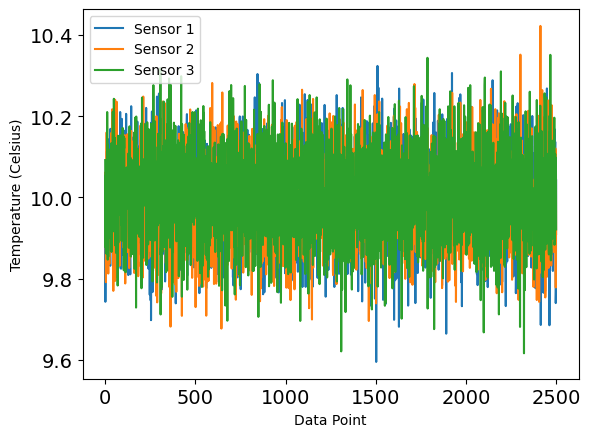

In [106]:
my_fontsize = 14

random_data_df.plot(kind='line',
                    xlabel="Data Point", ylabel="Temperature (Celsius)",
                    fontsize=my_fontsize, legend=True)

Look at its distribution (via Kernel Density Estimate plot):

Text(0, 0.5, 'Occurrence')

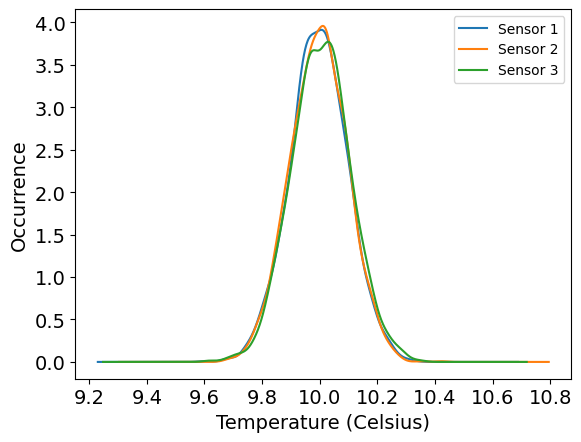

In [107]:
kde_graph = random_data_df.plot(kind='kde', fontsize=my_fontsize, legend=True)

kde_graph.set_xlabel("Temperature (Celsius)", fontsize=my_fontsize)
kde_graph.set_ylabel("Occurrence", fontsize=my_fontsize)

Let's also prove to ourselves that our mean is close to 10 and the standard deviation is close to 0.1.

In [108]:
np.mean(random_data)

np.float64(9.999650416134038)

In [109]:
np.std(random_data)

np.float64(0.10077507810312142)

Remember, in science, the mean and standard deviations are often presented together in the following way:

mean $\pm$ standard deviation

In [110]:
f'{np.mean(random_data)} ± {np.std(random_data)}'

'9.999650416134038 ± 0.10077507810312142'

<div class="alert alert-block alert-warning">
<hr style="border:1.5px dashed gray"></hr>

## Extra Information

### 1. Details concerning standard deviation and variance

Why can't I reproduce results using spreadsheets or Matlab?

In [ ]:
data = [1, 2, 4, 5, 8]

<div class="alert alert-block alert-warning">

#### variance
- Libreoffice spreadsheet give a variance of '=VAR(1,2,4,5,8)' of 7.5
- I believe Matlab also gives 7.5

Using the statistics's library

In [ ]:
import statistics

In [ ]:
statistics.variance(data)

<div class="alert alert-block alert-warning">

These above results are actually termed 'the sample variance.'

However, if you use NumPy by simply typing:

In [ ]:
np.var(data)

<div class="alert alert-block alert-warning">

In this case there is a "hidden" variable called `ddof` ("Delta Degrees of Freedom")
    - the denomenator is divided by 'N -ddof'

https://numpy.org/doc/1.18/reference/generated/numpy.var.html?highlight=variance

- population: "ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables"
- sample: "ddof=1 provides an unbiased estimator of the variance of a hypothetical infinite population"

The same is true for standard deviation.

Population variance:

In [ ]:
np.var(data, ddof=0)

<div class="alert alert-block alert-warning">

Sample variance (always larger than the population variance):

In [ ]:
np.var(data, ddof=1)

<div class="alert alert-block alert-warning">

Standard deviation demo

<b>Libreoffice</b> gives '=stdev(1,2,4,5,8)' of <b>2.7386127875</b>

And the <b>Statistics library</b> gives:

In [ ]:
statistics.stdev(data)

<div class="alert alert-block alert-warning">

NumPy's sample standard deviation

In [ ]:
np.std(data, ddof=1)

<div class="alert alert-block alert-warning">

NumPy's population standard deviation

In [ ]:
np.std(data, ddof=0)

<hr style="border:1.5px dashed gray"></hr>

### And finally, some weirdness

In [111]:
import statistics

The following should provide a <b>mean value</b> of <b>1.0</b>

(i.e., <b>sum</b> of the numbers is <b>4</b> and then <b>divide</b> by <b>4</b>)

In [112]:
numbers_list = [1e30, 1.0, 3.0, -1e30]

statistics.mean(numbers_list)

1.0

In [113]:
np.mean(numbers_list)

np.float64(0.0)

This appears to be coming from the data type

In [114]:
np.array(numbers_list).dtype

dtype('float64')

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

`numpy.mean(a, axis=None, dtype=None, out=None, keepdims=<no value>, *, where=<no value>)`

`dtype data-type, optional`
- <b>Type to use in computing the mean</b>.
    - For <b>integer</b> inputs, the <b>default</b> is <b>float64</b>
    - For <b>floating point</b> inputs, it is the same as the <b>input dtype</b>.


In [115]:
np.mean(numbers_list, dtype=np.float64)

np.float64(0.0)

In [116]:
np.mean(numbers_list, dtype=np.int8)

/home/karl/conda/envs/science/lib/python3.13/site-packages/numpy/_core/_methods.py:135: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


np.int8(1)

<b>Take home message</b>: you should always take a look at NumPy's manual to make sure you are doing what you think you are doing

- keep an eye out for default settings

<hr style="border:2px solid gray"></hr>

Additional resource to further learn and test your knowledge: https://github.com/rougier/numpy-100

<hr style="border:2px solid gray"></hr>